

---


1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
# # https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# input_layer = Input(shape=(n,))
# embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
# flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

#Starting with the Assignment

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, concatenate
from tensorflow.keras.models import Model
import keras



In [ ]:
# Mounting google drive



In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Getting preprocessed reviews
Data = pd.read_csv("/content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/preprocessed_data.csv")


In [ ]:
print(Data.shape)
Data.head(5)

(109248, 9)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
Data["remaining_numerical_features"] = Data["teacher_number_of_previously_posted_projects"]+ Data["price"]

In [ ]:
Data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,remaining_numerical_features
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,778.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,217.03


Splitting the Data First into Train and text


In [ ]:
Y = Data["project_is_approved"]
Data.drop(labels="project_is_approved",axis=1,inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, Y, test_size=0.25,stratify=Y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(81936, 9)
(27312, 9)
(81936,)
(27312,)


In [ ]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
#https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

# max_length= max([len(x.split()) for x in X_train["essay"].tolist()])
# print(max_length)
# Since the Max length of the reviews is 339. we'll take max length as 300
#Few reviews will be truncated this way but it should be okay


Featurzing text data


In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

t = Tokenizer()

t.fit_on_texts(X_train["essay"])

vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train["essay"])
#print(encoded_docs)
# pad documents to a max length of max_length words
padded_docs = pad_sequences(encoded_docs, maxlen=300, padding='post')
print(padded_docs)








[[  14 2629  770 ...    0    0    0]
 [   4  216  462 ...    0    0    0]
 [  29 3450  219 ...    0    0    0]
 ...
 [   2 4546   72 ...    0    0    0]
 [   4    1   78 ...    0    0    0]
 [   4    1  105 ...    0    0    0]]


In [ ]:
encoded_docs = t.texts_to_sequences(X_test["essay"])
padded_docs_test = pad_sequences(encoded_docs, maxlen=300, padding='pre')

In [ ]:
import pickle

glove_vector = open('/content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/glove.6B.300d.txt')


In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
from numpy import asarray

embeddings_index = dict()
for line in glove_vector:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
glove_vector.close()


In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# create a weight matrix for words in training docs

from numpy import zeros

embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
    
		embedding_matrix[i] = embedding_vector



Getting Categorial Features ready for EMbedding layer

- School State

In [ ]:
# Using Tokenizer to encode Categorical features and then Post padding them

# School State
#Appraoch - 1- Fitting the Tokenizer on the lists of categorical values
 
t2 = Tokenizer()

t2.fit_on_texts(X_train["school_state"])

vocab_size_School_State = len(t2.word_index) + 1

# integer encode the documents
encoded_school_state_train = t2.texts_to_sequences(X_train["school_state"])
encoded_school_state_test=  t2.texts_to_sequences(X_test["school_state"])



In [ ]:
from keras.preprocessing import sequence

#Maxlen is going to be 1 always as its categorical encoding

padded_school_state_train = sequence.pad_sequences(encoded_school_state_train, maxlen = 1, padding='post')

In [ ]:
padded_school_state_test = sequence.pad_sequences(encoded_school_state_test, maxlen = 1, padding='post')

- project grade category

In [ ]:
t2 = Tokenizer()

t2.fit_on_texts(X_train["project_grade_category"])


vocab_size_project_project_grade = len(t2.word_index) + 1

# integer encode the documents
encoded_project_grade_category_train = t2.texts_to_sequences(X_train["project_grade_category"])
encoded_project_grade_category_test=  t2.texts_to_sequences(X_test["project_grade_category"])

In [ ]:
padded_project_grade_category_train = sequence.pad_sequences(encoded_project_grade_category_train, maxlen = 1, padding='post')

padded_project_grade_category_test = sequence.pad_sequences(encoded_project_grade_category_test, maxlen = 1, padding='post')

- input clean categories

In [ ]:
t2 = Tokenizer()

t2.fit_on_texts(X_train["clean_categories"])


vocab_size_clean_categories = len(t2.word_index) + 1

# integer encode the documents
encoded_clean_categories_train = t2.texts_to_sequences(X_train["clean_categories"])
encoded_clean_categories_test=  t2.texts_to_sequences(X_test["clean_categories"])

In [ ]:
padded_clean_categories_train = sequence.pad_sequences(encoded_clean_categories_train, maxlen = 1, padding='post')

padded_clean_categories_test = sequence.pad_sequences(encoded_clean_categories_test, maxlen = 1, padding='post')

- clean subcategories

In [ ]:
t2 = Tokenizer()

t2.fit_on_texts(X_train["clean_subcategories"])


vocab_size_clean_subcategories = len(t2.word_index) + 1

# integer encode the documents
encoded_clean_subcategories_train = t2.texts_to_sequences(X_train["clean_subcategories"])
encoded_clean_subcategories_test=  t2.texts_to_sequences(X_test["clean_subcategories"])

In [ ]:
padded_clean_subcategories_train = sequence.pad_sequences(encoded_clean_subcategories_train, maxlen = 1, padding='post')

padded_clean_subcategories_test = sequence.pad_sequences(encoded_clean_subcategories_test, maxlen = 1, padding='post')

- input teacher prefix

In [ ]:
t2 = Tokenizer()

t2.fit_on_texts(X_train["teacher_prefix"])

vocab_size_teacher_prefix = len(t2.word_index) + 1

# integer encode the documents
encoded_teacher_prefix_train = t2.texts_to_sequences(X_train["teacher_prefix"])
encoded_teacher_prefix_test=  t2.texts_to_sequences(X_test["teacher_prefix"])

In [ ]:
padded_teacher_prefix_train = sequence.pad_sequences(encoded_teacher_prefix_train, maxlen = 1, padding='post')

padded_teacher_prefix_test = sequence.pad_sequences(encoded_teacher_prefix_test, maxlen = 1, padding='post')

In [ ]:
padded_teacher_prefix_train[15660]

array([1], dtype=int32)

Model 1

In [ ]:
# Defiing Custom AUC for keras
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

from sklearn.metrics import roc_auc_score

# def auroc(y_true, y_pred):
#     score = tf.py_function( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
#                         [y_true, y_pred],
#                         'float32',
#                         stateful=True,
#                         name='sklearnAUC' )
#     return score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)





In [ ]:

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import LSTM, Flatten, Dense,BatchNormalization
from keras.initializers import he_normal
from keras.optimizers import Adam
from keras.regularizers import l2

from keras.callbacks import TensorBoard
from time import time

#clearing the graph of tensorflow
tf.keras.backend.clear_session()

#300 is the size of sequence 'cause of padding
input_1 = Input(shape=(300,))

E_layer1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input_1)
E_layer1 = Dropout(0.3)(E_layer1)

E_layer1 = LSTM(128,return_sequences=True)(E_layer1)
E_layer1 = Flatten()(E_layer1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  


#Input State
input_2 = Input(shape=(1,))
E_layer2 = Embedding(input_dim=vocab_size_School_State, output_dim=cat_embsizes['school_state'])(input_2)
E_layer2 = Flatten()(E_layer2)

#teacher_prefix
input_3 = Input(shape=(1,))
E_layer3 = Embedding(input_dim=vocab_size_teacher_prefix, output_dim=cat_embsizes['teacher_prefix'])(input_3)
E_layer3 = Flatten()(E_layer3)

# project _ grade _ category
input_4 = Input(shape=(1,))
E_layer4 = Embedding(input_dim=vocab_size_project_project_grade, output_dim=cat_embsizes['project_grade_category'])(input_4)
E_layer4 = Flatten()(E_layer4)

#Clean Categories
input_5 = Input(shape=(1,))
E_layer5 = Embedding(input_dim=vocab_size_clean_categories, output_dim=cat_embsizes['project_grade_category'])(input_5)
E_layer5 = Flatten()(E_layer5)

#Clean Subcategories
input_6 = Input(shape=(1,))
E_layer6 = Embedding(input_dim=vocab_size_clean_subcategories, output_dim=cat_embsizes['clean_subcategories'])(input_6)
E_layer6 = Flatten()(E_layer6)

#numerical features
input_7 = Input(shape=(1,))
Dense_numerical = Dense(24,activation='relu')(input_7)

#Concatlayer
concat_layer = concatenate([E_layer1,E_layer2, E_layer3, E_layer4,E_layer5,E_layer6, Dense_numerical])

# Dense Layer
Dense_concat1 = Dense(128, activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat_layer)

#Drop
Drop_layer1 = Dropout(0.3)(Dense_concat1)

#Dense Layer
Dense_concat2 = Dense(64, activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(Drop_layer1)

#Drop
Drop_layer2 =Dropout(0.3)(Dense_concat2)

Batch_Normal = BatchNormalization()(Drop_layer2)

# Dense
Dense_concat3 = Dense(32, activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(Batch_Normal)

#Dense Output

Dense_output = Dense(2, activation = 'softmax')(Dense_concat3)

model = Model([input_1, input_2, input_3, input_4, input_5, input_6, input_7], Dense_output)


# introducing checkpoints to save the best model weights
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


filepath="content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/weights.best.hdf5"

checkpoints =  ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorboard = TensorBoard(log_dir='/content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/logs/{}'.format(time()))


es = EarlyStopping(monitor='val_loss',patience=4, verbose=1)

callback_list = [checkpoints, tensorboard,es]

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4), metrics=['accuracy', auroc])
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     15165600    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 300, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [ ]:
# Changing the y into Categorical variable

#https://stackoverflow.com/questions/61464888/tensorflow-error-valueerrorshapes-s-and-s-are-incompatible-self-other

from keras.utils import to_categorical

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)



In [ ]:
print(y_train.shape)

(81936, 2)


In [ ]:
# Combining All the features to have train and test

Train_data =  [padded_docs, padded_school_state_train,padded_teacher_prefix_train, padded_project_grade_category_train, padded_clean_categories_train,padded_clean_subcategories_train, X_train["remaining_numerical_features"]]
Test_data = [padded_docs_test, padded_school_state_test,padded_teacher_prefix_test, padded_project_grade_category_test, padded_clean_categories_test, padded_clean_subcategories_test, X_test["remaining_numerical_features"]]

In [ ]:
model.fit(Train_data,y_train,validation_split=0.33,epochs=20,verbose=1,batch_size=128, callbacks =callback_list)

Epoch 1/20
429/429 [==============================] - 54s 125ms/step - loss: 0.4355 - accuracy: 0.8473 - auroc: 0.6451 - val_loss: 0.4203 - val_accuracy: 0.8480 - val_auroc: 0.7056

Epoch 00001: val_accuracy improved from -inf to 0.84803, saving model to content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/weights.best.hdf5
Epoch 2/20
429/429 [==============================] - 53s 123ms/step - loss: 0.4140 - accuracy: 0.8473 - auroc: 0.6960 - val_loss: 0.4016 - val_accuracy: 0.8501 - val_auroc: 0.7308

Epoch 00002: val_accuracy improved from 0.84803 to 0.85007, saving model to content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/weights.best.hdf5
Epoch 3/20
429/429 [==============================] - 53s 123ms/step - loss: 0.4019 - accuracy: 0.8498 - auroc: 0.7151 - val_loss: 0.4076 - val_accuracy: 0.8481 - val_auroc: 0.7378

Epoch 00003: val_accuracy did not improve from 0.85007
Epoch 4/20
429/429 [==============================] - 53s 124ms/step - loss: 0.3965 - accu

In [ ]:
# Loading the model with the best weights learned through callbacks


from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import LSTM, Flatten, Dense
from keras.initializers import he_normal
from keras.optimizers import Adam

from keras.callbacks import TensorBoard
from time import time

#clearing the graph of tensorflow
tf.keras.backend.clear_session()

#300 is the size of sequence 'cause of padding
input_1 = Input(shape=(300,))

E_layer1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input_1)
E_layer1 = Dropout(0.3)(E_layer1)

E_layer1 = LSTM(128,return_sequences=True)(E_layer1)
E_layer1 = Flatten()(E_layer1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  


#Input State
input_2 = Input(shape=(1,))
E_layer2 = Embedding(input_dim=vocab_size_School_State, output_dim=cat_embsizes['school_state'])(input_2)
E_layer2 = Flatten()(E_layer2)

#teacher_prefix
input_3 = Input(shape=(1,))
E_layer3 = Embedding(input_dim=vocab_size_teacher_prefix, output_dim=cat_embsizes['teacher_prefix'])(input_3)
E_layer3 = Flatten()(E_layer3)

# project _ grade _ category
input_4 = Input(shape=(1,))
E_layer4 = Embedding(input_dim=vocab_size_project_project_grade, output_dim=cat_embsizes['project_grade_category'])(input_4)
E_layer4 = Flatten()(E_layer4)

#Clean Categories
input_5 = Input(shape=(1,))
E_layer5 = Embedding(input_dim=vocab_size_clean_categories, output_dim=cat_embsizes['project_grade_category'])(input_5)
E_layer5 = Flatten()(E_layer5)

#Clean Subcategories
input_6 = Input(shape=(1,))
E_layer6 = Embedding(input_dim=vocab_size_clean_subcategories, output_dim=cat_embsizes['clean_subcategories'])(input_6)
E_layer6 = Flatten()(E_layer6)

#numerical features
input_7 = Input(shape=(1,))
Dense_numerical = Dense(24,activation='relu')(input_7)

#Concatlayer
concat_layer = concatenate([E_layer1,E_layer2, E_layer3, E_layer4,E_layer5,E_layer6, Dense_numerical])

# Dense Layer
Dense_concat1 = Dense(128, activation='relu',kernel_initializer=he_normal())(concat_layer)

#Drop
Drop_layer1 = Dropout(0.3)(Dense_concat1)

#Dense Layer
Dense_concat2 = Dense(64, activation='relu',kernel_initializer=he_normal())(Drop_layer1)

#Drop
Drop_layer2 =Dropout(0.3)(Dense_concat2)

Batch_Normal = BatchNormalization()(Drop_layer2)
# Dense
Dense_concat3 = Dense(32, activation='relu',kernel_initializer=he_normal())(Batch_Normal)

#Dense Output

Dense_output = Dense(2, activation = 'softmax')(Dense_concat3)

model = Model([input_1, input_2, input_3, input_4, input_5, input_6, input_7], Dense_output)



filepath="content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/weights.best.hdf5"

tensorboard = TensorBoard(log_dir='/content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/logs/{}'.format(time()))

model.load_weights(filepath)

callback_list = [tensorboard]

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4), metrics=['accuracy', auroc])


In [ ]:
# Prediction on Test Data
from sklearn.metrics import roc_auc_score

# Train
y_train_pred = model.predict(Train_data)
print("Train AUC:",roc_auc_score(y_train,y_train_pred))




Train AUC: 0.7768090115041786


In [ ]:
#Test
y_test_pred = model.predict(Test_data)
print("Test AUC:",roc_auc_score(y_test,y_test_pred))


Test AUC: 0.7211552553198166


In [ ]:
%reload_ext tensorboard

%tensorboard --logdir="/content/drive/MyDrive/kaggle_folder/Donors Choose LSTM/Output/logs/"

2. Model Two

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below.

1. Train the TF-IDF on the Train data 

2. Get the idf value for each word we have in the train data. 

3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)

4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)
tfidf = vectorizer.fit(X_train["essay"])


In [ ]:
# Getting the idf values
idf = tfidf.idf_


In [ ]:
print(type(idf))

<class 'numpy.ndarray'>


{'boxes': [<matplotlib.lines.Line2D at 0x7faada4cbe10>],
 'caps': [<matplotlib.lines.Line2D at 0x7faada380ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faada389f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faada3899d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faada380450>,
  <matplotlib.lines.Line2D at 0x7faada380990>]}

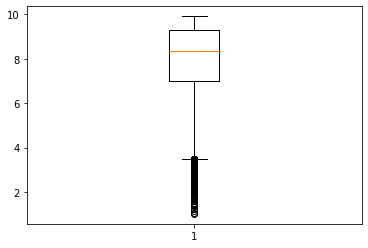

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(idf)

In [ ]:
percentile_25th  = np.percentile(idf,25)
percentile_75th  = np.percentile(idf,75)

In [ ]:
print("25 the percentile is", percentile_25th )
print("75 the percentile is", percentile_75th)


25 the percentile is  6.990695959136977
75 the percentile is 9.317973664721395


In [ ]:
print(len(vectorizer.get_feature_names()))
print(len(idf))


14898
14898
